<a href="https://colab.research.google.com/github/Kalaiiiiii/Smart-CAPTCHA-Aid/blob/main/Captche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload your archive.zip file
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Change this if your uploaded file name is different
zip_path = "archive.zip"
extract_to = "captcha_images"

# Create target directory
os.makedirs(extract_to, exist_ok=True)

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Extracted to:", extract_to)


✅ Extracted to: captcha_images


In [3]:
# Define path to the 'samples' folder inside extracted archive
samples_folder = os.path.join(extract_to, "samples")


In [4]:
import os

# List all images in the 'samples' folder
img_files = [f for f in os.listdir(samples_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print("Total CAPTCHA images found:", len(img_files))
for i, file in enumerate(img_files[:5], 1):  # Show a few as a preview
    print(f"{i}: {file}")


Total CAPTCHA images found: 1070
1: e667x.png
2: enpw2.png
3: 74eyg.png
4: 44fyb.png
5: 245y5.png


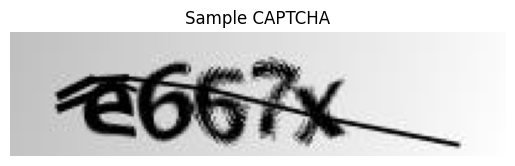

In [5]:
import cv2
import matplotlib.pyplot as plt

if len(img_files) == 0:
    print("❌ No images found in samples folder.")
else:
    sample_img_path = os.path.join(samples_folder, img_files[0])
    img = cv2.imread(sample_img_path)

    if img is None:
        print("❌ Failed to load image:", sample_img_path)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Sample CAPTCHA")
        plt.show()


In [6]:
!pip install pytesseract
!apt install tesseract-ocr -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [7]:
import pytesseract

# Optional: set path if needed
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


In [8]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    return thresh


In [9]:
def extract_text(image_path):
    processed_img = preprocess_image(image_path)

    # Run OCR
    text = pytesseract.image_to_string(processed_img, config='--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')

    return text.strip()


In [10]:
sample_img_path = os.path.join(samples_folder, img_files[0])
extracted = extract_text(sample_img_path)

print("🧾 Extracted CAPTCHA Text:", extracted)


🧾 Extracted CAPTCHA Text: 


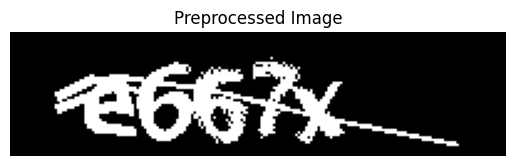

In [11]:
import matplotlib.pyplot as plt

processed = preprocess_image(sample_img_path)
plt.imshow(processed, cmap='gray')
plt.axis('off')
plt.title('Preprocessed Image')
plt.show()


In [12]:
custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

def extract_text(image_path):
    processed_img = preprocess_image(image_path)
    text = pytesseract.image_to_string(processed_img, config=custom_config)
    return text.strip()

print("🧾 Extracted CAPTCHA Text:", extract_text(sample_img_path))


🧾 Extracted CAPTCHA Text: 


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2


In [14]:
CAPTCHA_IMAGE_FOLDER = "/content/samples"  # your extracted folder
CAPTCHA_LENGTH = 5   # change if yours is not 5-character long
CHARACTERS = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
IMG_WIDTH = 200
IMG_HEIGHT = 50


In [15]:
def load_data():
    data = []
    labels = []

    for file in os.listdir(CAPTCHA_IMAGE_FOLDER):
        if file.endswith(".png") or file.endswith(".jpg"):
            label = file.split(".")[0]  # filename is label.png
            img_path = os.path.join(CAPTCHA_IMAGE_FOLDER, file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
            image = image / 255.0  # normalize

            data.append(image)
            labels.append(label)
    return np.array(data), labels


In [16]:
def encode_label(label):
    encoded = np.zeros((CAPTCHA_LENGTH, len(CHARACTERS)))
    for i, char in enumerate(label):
        idx = CHARACTERS.find(char)
        encoded[i, idx] = 1
    return encoded


In [17]:
X, y = load_data()
X = X.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)

Y = np.array([encode_label(label) for label in y])
Y = [Y[:, i, :] for i in range(CAPTCHA_LENGTH)]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


FileNotFoundError: [Errno 2] No such file or directory: '/content/samples'

In [18]:
!ls /content


archive.zip  captcha_images  sample_data


In [19]:
CAPTCHA_IMAGE_FOLDER = "/content/captcha_images/samples"


In [20]:
X, y = load_data()
X = X.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1)

Y = np.array([encode_label(label) for label in y])
Y = [Y[:, i, :] for i in range(CAPTCHA_LENGTH)]


In [21]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(CHARACTERS)*CAPTCHA_LENGTH, activation='softmax'))
    return model


In [22]:
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train as multi-output model (1 output per character)
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_train' is not defined

In [23]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Make sure Y is in the correct format (list of arrays for multi-output)
Y_train = [y[:, :] for y in Y_train]
Y_test = [y[:, :] for y in Y_test]


ValueError: Found input variables with inconsistent numbers of samples: [1070, 5]

In [24]:
# Split BEFORE encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
Y_train = np.array([encode_label(label) for label in y_train])
Y_test = np.array([encode_label(label) for label in y_test])


In [26]:
Y_train = [Y_train[:, i, :] for i in range(CAPTCHA_LENGTH)]
Y_test = [Y_test[:, i, :] for i in range(CAPTCHA_LENGTH)]


In [27]:
model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/15


ValueError: y_true and y_pred have different structures.
y_true: ('*', '*', '*', '*', '*')
y_pred: *


In [28]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def create_cnn_model():
    input_layer = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)

    outputs = []
    for _ in range(CAPTCHA_LENGTH):
        outputs.append(Dense(NUM_CLASSES, activation='softmax')(x))

    model = Model(inputs=input_layer, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

model = create_cnn_model()


NameError: name 'NUM_CLASSES' is not defined

In [29]:
CAPTCHA_LENGTH = 5  # or however many characters are in each CAPTCHA
CHAR_SET = "abcdefghijklmnopqrstuvwxyz0123456789"  # adjust based on your CAPTCHAs
NUM_CLASSES = len(CHAR_SET)  # Total possible characters


In [30]:
char_to_index = {char: idx for idx, char in enumerate(CHAR_SET)}
index_to_char = {idx: char for idx, char in enumerate(CHAR_SET)}


In [31]:
model = create_cnn_model()
model.summary()  # optional, to check architecture


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 50, 200,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 50, 200,   │        320 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 25, 100,   │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 25, 100,   │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 12, 50,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 38400)     │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 36)        │  1,382,436 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 36)        │  1,382,436 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 36)        │  1,382,436 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 36)        │  1,382,436 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 36)        │  1,382,436 │ flatten_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,930,996 (26.44 MB)

 Trainable params: 6,930,996 (26.44 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
X, y_raw = load_data()  # X.shape should be (num_samples, 50, 200, 1)


In [33]:
from tensorflow.keras.utils import to_categorical
import numpy as np

def encode_label(label):
    label_encoded = []
    for char in label:
        one_hot = to_categorical(char_to_index[char], num_classes=NUM_CLASSES)
        label_encoded.append(one_hot)
    return np.array(label_encoded)

# Apply to all labels
Y = np.array([encode_label(lbl) for lbl in y_raw])  # shape = (num_samples, 5, 36)

# Split each character position as a separate output (for multi-output model)
Y_split = [Y[:, i, :] for i in range(CAPTCHA_LENGTH)]  # List of 5 arrays, each of shape (num_samples, 36)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train_split, Y_test_split = train_test_split(X, Y_split, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [1070, 5]

In [35]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y_raw, test_size=0.2, random_state=42)


In [36]:
def encode_labels_batch(labels):
    result = np.zeros((len(labels), CAPTCHA_LENGTH, NUM_CLASSES))
    for i, label in enumerate(labels):
        for j, char in enumerate(label):
            result[i, j, char_to_index[char]] = 1.0
    return result

Y_train = encode_labels_batch(y_train_raw)
Y_test = encode_labels_batch(y_test_raw)


In [37]:
Y_train_split = [Y_train[:, i, :] for i in range(CAPTCHA_LENGTH)]
Y_test_split = [Y_test[:, i, :] for i in range(CAPTCHA_LENGTH)]


In [38]:
model.fit(X_train_raw, Y_train_split,
          validation_data=(X_test_raw, Y_test_split),
          epochs=15, batch_size=32)


Epoch 1/15


ValueError: For a model with multiple outputs, when providing the `metrics` argument as a list, it should have as many entries as the model has outputs. Received:
metrics=['accuracy']
of length 1 whereas the model has 5 outputs.

In [39]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] * CAPTCHA_LENGTH  # Provide 5 accuracy metrics
)


In [40]:
model.fit(
    X_train_raw, Y_train_split,
    validation_data=(X_test_raw, Y_test_split),
    epochs=15,
    batch_size=32
)


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 705ms/step - dense_2_accuracy: 0.0715 - dense_2_loss: 3.4533 - dense_3_accuracy: 0.0674 - dense_3_loss: 3.3817 - dense_4_accuracy: 0.0716 - dense_4_loss: 3.2850 - dense_5_accuracy: 0.0750 - dense_5_loss: 3.4423 - dense_6_accuracy: 0.0629 - dense_6_loss: 3.3827 - loss: 16.9461 - val_dense_2_accuracy: 0.3364 - val_dense_2_loss: 2.6059 - val_dense_3_accuracy: 0.4019 - val_dense_3_loss: 2.6809 - val_dense_4_accuracy: 0.0888 - val_dense_4_loss: 2.8435 - val_dense_5_accuracy: 0.1121 - val_dense_5_loss: 2.8380 - val_dense_6_accuracy: 0.1495 - val_dense_6_loss: 2.7318 - val_loss: 13.6853
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 630ms/step - dense_2_accuracy: 0.5094 - dense_2_loss: 2.0857 - dense_3_accuracy: 0.4804 - dense_3_loss: 2.2944 - dense_4_accuracy: 0.2722 - dense_4_loss: 2.4106 - dense_5_accuracy: 0.2061 - dense_5_loss: 2.5241 - dense_6_accuracy: 0.2370 - dense_6_loss: 2.4466 - loss: 11.7632 - val_dense_2_accuracy: 0.7897 - val_dense_2_loss: 0

In [41]:
!pip install gradio

import gradio as gr

def predict_captcha(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (200, 50)) / 255.0
    img = img.reshape(1, 50, 200, 1)
    preds = model.predict(img)
    result = ''.join([index_to_char[p.argmax()] for p in preds])
    return result

gr.Interface(fn=predict_captcha, inputs="image", outputs="text", title="CAPTCHA Reader Demo").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fd9e5cffa01df8be2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


KeyboardInterrupt: 

In [42]:
gr.Interface(fn=predict_captcha, inputs="image", outputs="text", title="CAPTCHA Reader Demo").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d85ddb8312cd3c8a04.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
